Import everything you need — including the model class (here it's GCNConv).

In [1]:
import torch
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv  # Replace with GATConv, SAGEConv, etc.
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score, mean_squared_error

# 🔁 Load datasets
task = "classification"  # or "regression"

train_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_train.pt")
val_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_val.pt")
test_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_test.pt")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# 🧱 Define Model (GCN or MPNN or GraphSAGE, etc.)
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = global_mean_pool(x, batch)  # Aggregate node features to graph level
        return self.lin(x)


# 🧮 Loss and evaluation setup
if task == "classification":
    num_classes = len(set([int(data.y.item()) for data in train_data]))
    model = GCN(in_channels=train_data[0].x.size(1), hidden_channels=64, out_channels=num_classes)
    criterion = torch.nn.CrossEntropyLoss()
else:
    model = GCN(in_channels=train_data[0].x.size(1), hidden_channels=64, out_channels=1)
    criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🏋️ Training loop
def train():
    model.train()
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out.squeeze(), batch.y if task == "regression" else batch.y.long())
        loss.backward()
        optimizer.step()

# 📈 Evaluation
def evaluate(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.squeeze().cpu())
            labels.append(batch.y.cpu())
    preds = torch.cat(preds)
    labels = torch.cat(labels)

    if task == "classification":
        pred_classes = preds.argmax(dim=1)
        return accuracy_score(labels, pred_classes)
    else:
        return mean_squared_error(labels, preds)

# 🚀 Run training
for epoch in range(1, 101):
    train()
    metric = evaluate(val_loader)
    print(f"Epoch {epoch:03d} - {'Accuracy' if task == 'classification' else 'MSE'}: {metric:.4f}")

# ✅ Final test evaluation
test_metric = evaluate(test_loader)
print(f"\n🧪 Test {'Accuracy' if task == 'classification' else 'MSE'}: {test_metric:.4f}")


Epoch 001 - Accuracy: 0.5192
Epoch 002 - Accuracy: 0.5192
Epoch 003 - Accuracy: 0.5192
Epoch 004 - Accuracy: 0.5192
Epoch 005 - Accuracy: 0.5192
Epoch 006 - Accuracy: 0.5192
Epoch 007 - Accuracy: 0.5192
Epoch 008 - Accuracy: 0.5192
Epoch 009 - Accuracy: 0.5192
Epoch 010 - Accuracy: 0.5192
Epoch 011 - Accuracy: 0.5192
Epoch 012 - Accuracy: 0.5192
Epoch 013 - Accuracy: 0.5192
Epoch 014 - Accuracy: 0.5192
Epoch 015 - Accuracy: 0.5192
Epoch 016 - Accuracy: 0.5192
Epoch 017 - Accuracy: 0.5192
Epoch 018 - Accuracy: 0.5192
Epoch 019 - Accuracy: 0.5192
Epoch 020 - Accuracy: 0.5192
Epoch 021 - Accuracy: 0.5192
Epoch 022 - Accuracy: 0.5192
Epoch 023 - Accuracy: 0.5192
Epoch 024 - Accuracy: 0.5000
Epoch 025 - Accuracy: 0.5192
Epoch 026 - Accuracy: 0.5192
Epoch 027 - Accuracy: 0.6731
Epoch 028 - Accuracy: 0.5192
Epoch 029 - Accuracy: 0.5192
Epoch 030 - Accuracy: 0.6538
Epoch 031 - Accuracy: 0.6346
Epoch 032 - Accuracy: 0.6346
Epoch 033 - Accuracy: 0.7115
Epoch 034 - Accuracy: 0.5192
Epoch 035 - Ac

load the graph datasets  (the random split .pt files ) and specify what task you are doing

In [ ]:
task = "classification"  # or "regression"

train_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_train.pt")
val_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_val.pt")
test_data = torch.load(f"../4_train_test_split/random_split/{task}/{task}_test.pt")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Define the model you want to use (GCN or MPNN or GraphSAGE, etc.)

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

setup loss and evaluation 

In [ ]:
if task == "classification":
    num_classes = len(set([int(data.y.item()) for data in train_data]))
    model = GCN(in_channels=train_data[0].x.size(1), hidden_channels=64, out_channels=num_classes)
    criterion = torch.nn.CrossEntropyLoss()
else:
    model = GCN(in_channels=train_data[0].x.size(1), hidden_channels=64, out_channels=1)
    criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🏋️ Training loop
def train():
    model.train()
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out.squeeze(), batch.y if task == "regression" else batch.y.long())
        loss.backward()
        optimizer.step()

# 📈 Evaluation
def evaluate(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.squeeze().cpu())
            labels.append(batch.y.cpu())
    preds = torch.cat(preds)
    labels = torch.cat(labels)

    if task == "classification":
        pred_classes = preds.argmax(dim=1)
        return accuracy_score(labels, pred_classes)
    else:
        return mean_squared_error(labels, preds)


🚀 Model training

In [ ]:
for epoch in range(1, 101):
    train()
    metric = evaluate(val_loader)
    print(f"Epoch {epoch:03d} - {'Accuracy' if task == 'classification' else 'MSE'}: {metric:.4f}")

# ✅ Final test evaluation
test_metric = evaluate(test_loader)
print(f"\n🧪 Test {'Accuracy' if task == 'classification' else 'MSE'}: {test_metric:.4f}")

MPNN Model

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import global_mean_pool
from torch.nn import Linear, ReLU
import os

# --- Task: "classification" or "regression" ---
task = "classification"  # Change to "regression" as needed
#task = "regression"  # Change to "classification" as needed

# --- Load .pt datasets ---
base_path = f"../4_train_test_split/random_split/{task}/"
train_data = torch.load(os.path.join(base_path, f"{task}_train.pt"))
val_data = torch.load(os.path.join(base_path, f"{task}_val.pt"))
test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# --- MPNN Layer Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')  # Aggregation method
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)


# --- Full MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = torch.nn.functional.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)


# --- Model Setup ---
input_dim = train_data[0].x.size(1)
edge_dim = train_data[0].edge_attr.size(1)
output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

model = MPNN(input_dim=input_dim, edge_dim=edge_dim, hidden_dim=64, output_dim=output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --- Training ---
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# --- Evaluation ---
def evaluate(loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
            else:
                pred = out.argmax(dim=1)
                correct += int((pred == batch.y).sum())
                total += batch.y.size(0)
    if task == "regression":
        return total_loss / len(loader)
    else:
        return correct / total
    
train_losses = []
val_accuracies = []

# --- Run Training ---
for epoch in range(1, 150):
    loss = train()
    val_score = evaluate(val_loader)
    train_losses.append(loss)
    val_accuracies.append(val_score)
    print(f"Epoch {epoch} | Train Loss: {loss:.4f} | {'Val MSE' if task=='regression' else 'Val Acc'}: {val_score:.4f}")

# --- Final Test ---
test_score = evaluate(test_loader)
print(f"{'Test MSE' if task=='regression' else 'Test Accuracy'}: {test_score:.4f}")


Epoch 1 | Train Loss: 0.9521 | Val Acc: 0.5192
Epoch 2 | Train Loss: 0.8726 | Val Acc: 0.5385
Epoch 3 | Train Loss: 0.8553 | Val Acc: 0.5192
Epoch 4 | Train Loss: 0.8827 | Val Acc: 0.5192
Epoch 5 | Train Loss: 0.8532 | Val Acc: 0.5192
Epoch 6 | Train Loss: 0.8710 | Val Acc: 0.5192
Epoch 7 | Train Loss: 0.8516 | Val Acc: 0.5192
Epoch 8 | Train Loss: 0.8442 | Val Acc: 0.5192
Epoch 9 | Train Loss: 0.8262 | Val Acc: 0.5385
Epoch 10 | Train Loss: 0.8228 | Val Acc: 0.6538
Epoch 11 | Train Loss: 0.8121 | Val Acc: 0.5769
Epoch 12 | Train Loss: 0.8208 | Val Acc: 0.6923
Epoch 13 | Train Loss: 0.8222 | Val Acc: 0.6346
Epoch 14 | Train Loss: 0.7898 | Val Acc: 0.6731
Epoch 15 | Train Loss: 0.7670 | Val Acc: 0.6923
Epoch 16 | Train Loss: 0.7716 | Val Acc: 0.6923
Epoch 17 | Train Loss: 0.7542 | Val Acc: 0.6731
Epoch 18 | Train Loss: 0.7465 | Val Acc: 0.6731
Epoch 19 | Train Loss: 0.7603 | Val Acc: 0.6346
Epoch 20 | Train Loss: 0.8287 | Val Acc: 0.6731
Epoch 21 | Train Loss: 0.7709 | Val Acc: 0.6731
E

 Plot Training Loss & Validation Accuracy

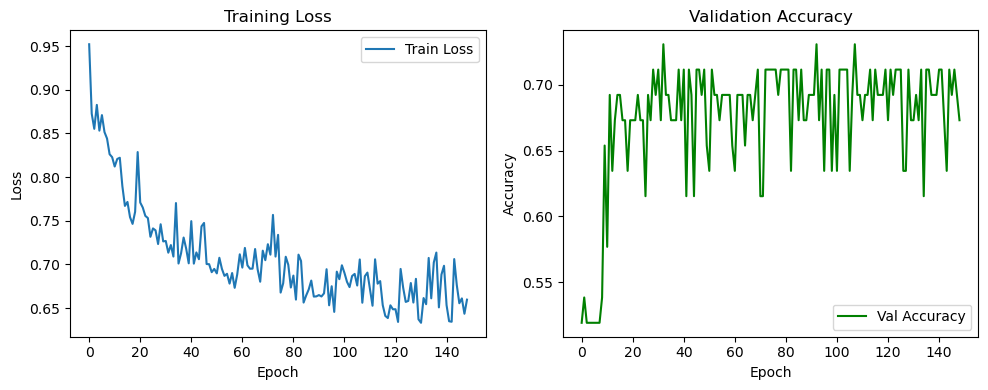

In [2]:
import matplotlib.pyplot as plt

# 📉 Plot training loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# 📈 Plot validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Val Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         6
      Medium       0.43      0.67      0.53        15
        High       0.83      0.76      0.79        33

    accuracy                           0.65        54
   macro avg       0.42      0.47      0.44        54
weighted avg       0.63      0.65      0.63        54



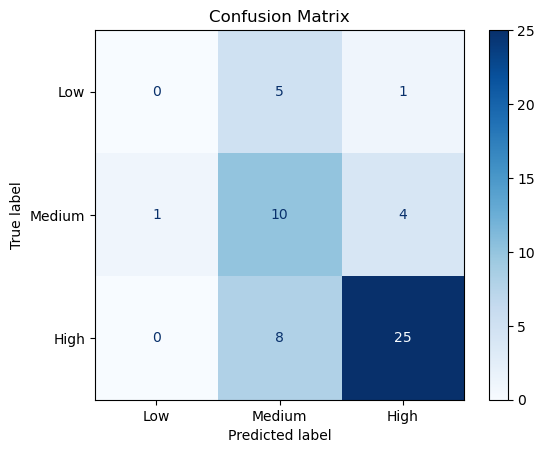

F1 Score (Macro): 0.4400


In [3]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
!pip install "numpy<2.0"
import numpy as np

# Collect all predictions and true labels from the test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        out = model(data)  # no keyword argument here
        preds = out.argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

# 🔍 Classification Report
print(classification_report(all_labels, all_preds, target_names=["Low", "Medium", "High"]))

# 🧮 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 🧠 F1-score (macro avg recommended for multiclass)
f1 = f1_score(all_labels, all_preds, average="macro")
print(f"F1 Score (Macro): {f1:.4f}")


MPNN MODEL WITH K-FOLD SPLIT DATASET

In [9]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from torch.nn import Linear
import os
import matplotlib.pyplot as plt

# --- Task: "classification" or "regression" ---
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"

# --- MPNN Layer ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- Full MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# --- Evaluation ---
def evaluate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
            else:
                pred = out.argmax(dim=1)
                correct += int((pred == batch.y).sum())
                total += batch.y.size(0)
    return total_loss / len(loader) if task == "regression" else correct / total

# --- Loop Through Folds ---
fold_train_losses = []
fold_val_scores = []
fold_test_scores = []

for fold in range(5):
    print(f"\n🔁 Fold {fold + 1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim=input_dim, edge_dim=edge_dim, hidden_dim=64, output_dim=output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_scores = []

    for epoch in range(1, 101):
        loss = train(model, train_loader, optimizer)
        val_score = evaluate(model, val_loader)
        train_losses.append(loss)
        val_scores.append(val_score)
        print(f"Epoch {epoch:>3} | Train Loss: {loss:.4f} | {'Val MSE' if task == 'regression' else 'Val Acc'}: {val_score:.4f}")

    test_score = evaluate(model, test_loader)
    print(f"✅ Fold {fold + 1} | {'Test MSE' if task == 'regression' else 'Test Accuracy'}: {test_score:.4f}")

    fold_train_losses.append(train_losses)
    fold_val_scores.append(val_scores)
    fold_test_scores.append(test_score)


🔁 Fold 1/5
Epoch   1 | Train Loss: 0.9141 | Val Acc: 0.4556
Epoch   2 | Train Loss: 0.8776 | Val Acc: 0.4556
Epoch   3 | Train Loss: 0.8614 | Val Acc: 0.4556
Epoch   4 | Train Loss: 0.8925 | Val Acc: 0.4556
Epoch   5 | Train Loss: 0.8579 | Val Acc: 0.4556
Epoch   6 | Train Loss: 0.8450 | Val Acc: 0.4556
Epoch   7 | Train Loss: 0.8436 | Val Acc: 0.4556
Epoch   8 | Train Loss: 0.8249 | Val Acc: 0.4556
Epoch   9 | Train Loss: 0.8349 | Val Acc: 0.4556
Epoch  10 | Train Loss: 0.8753 | Val Acc: 0.6111
Epoch  11 | Train Loss: 0.8155 | Val Acc: 0.4556
Epoch  12 | Train Loss: 0.8488 | Val Acc: 0.4556
Epoch  13 | Train Loss: 0.8492 | Val Acc: 0.4556
Epoch  14 | Train Loss: 0.8187 | Val Acc: 0.5111
Epoch  15 | Train Loss: 0.8161 | Val Acc: 0.5889
Epoch  16 | Train Loss: 0.8133 | Val Acc: 0.7778
Epoch  17 | Train Loss: 0.7880 | Val Acc: 0.7556
Epoch  18 | Train Loss: 0.7811 | Val Acc: 0.7556
Epoch  19 | Train Loss: 0.7687 | Val Acc: 0.7444
Epoch  20 | Train Loss: 0.8023 | Val Acc: 0.7444
Epoch  2

Plot metrics 

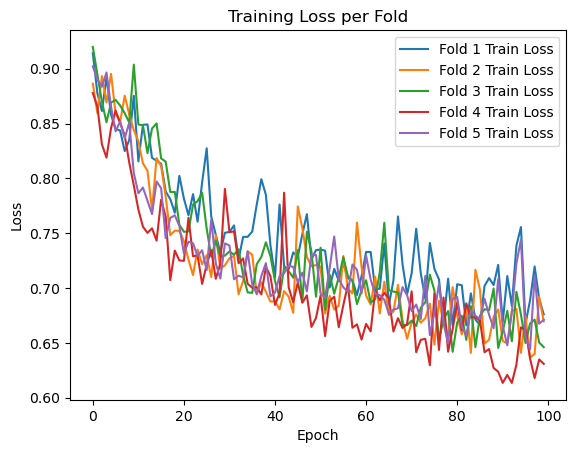

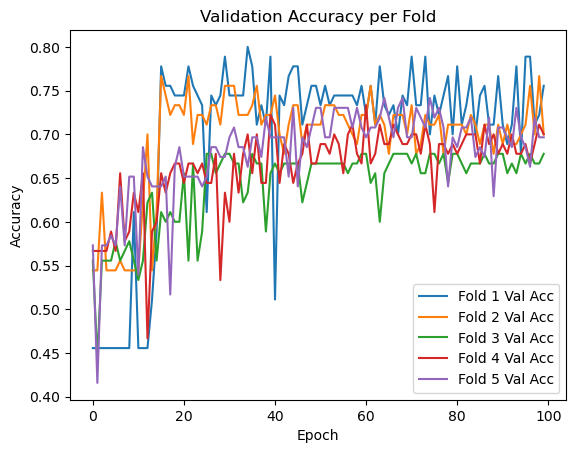

In [10]:
import matplotlib.pyplot as plt

for fold in range(5):
    plt.plot(fold_train_losses[fold], label=f"Fold {fold+1} Train Loss")
plt.title("Training Loss per Fold")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

if task == "classification":
    for fold in range(5):
        plt.plot(fold_val_scores[fold], label=f"Fold {fold+1} Val Acc")
    plt.title("Validation Accuracy per Fold")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
else:
    for fold in range(5):
        plt.plot(fold_val_scores[fold], label=f"Fold {fold+1} Val MSE")
    plt.title("Validation MSE per Fold")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
plt.legend()
plt.show()


In [11]:
import os
import pandas as pd
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Configuration
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
model_type = "MPNN"
input_type = "molecular_graph"
file_prefix = f"{model_type}_{task}"

# MPNN definitions
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# Helper functions
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    total_loss = 0
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                preds.extend(out.squeeze().tolist())
                labels.extend(batch.y.tolist())
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
            else:
                pred = out.argmax(dim=1)
                preds.extend(pred.tolist())
                labels.extend(batch.y.tolist())
    if task == "regression":
        return total_loss / len(loader), preds, labels
    else:
        acc = accuracy_score(labels, preds)
        return acc, preds, labels

# K-Fold Training
fold_metrics = []
best_fold = {"fold": -1, "val_metric": float('-inf')}
for fold in range(5):
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim=input_dim, edge_dim=edge_dim, hidden_dim=64, output_dim=output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(1, 101):
        train(model, train_loader, optimizer)

    val_metric, _, _ = evaluate(model, val_loader)
    if val_metric > best_fold["val_metric"]:
        best_fold = {"fold": fold, "val_metric": val_metric, "model": model}

    fold_metrics.append(val_metric)
    print(f"Fold {fold + 1} Validation Score: {val_metric:.4f}")

# Evaluation on test set with best model
test_score, y_pred, y_true = evaluate(best_fold["model"], test_loader)
print(f"\n✅ Best Fold: {best_fold['fold'] + 1}")
print(f"📊 Average Val Score: {sum(fold_metrics) / len(fold_metrics):.4f}")
print(f"📌 Test Score: {test_score:.4f}")



Fold 1 Validation Score: 0.7444
Fold 2 Validation Score: 0.7000
Fold 3 Validation Score: 0.6556
Fold 4 Validation Score: 0.7111
Fold 5 Validation Score: 0.7079

✅ Best Fold: 1
📊 Average Val Score: 0.7038
📌 Test Score: 0.6500


In [ ]:
# Summary and Plots
performance_summary = {}
if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "mse": mse,
        "r2_score": r2,
        "pearson_corr": pearson_corr
    }
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.close()

# Save summaries
performance_df = pd.DataFrame([performance_summary])
performance_df.to_csv(f"{file_prefix}_performance_summary.csv", index=False)
predictions_df = pd.DataFrame({"True": y_true, "Predicted": y_pred})
predictions_df.to_csv(f"{file_prefix}_predictions.csv", index=False)


In [12]:
# Summary and Plots
performance_summary = {}
if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "mse": mse,
        "r2_score": r2,
        "pearson_corr": pearson_corr
    }
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.close()

# Save summaries
performance_df = pd.DataFrame([performance_summary])
performance_df.to_csv(f"{file_prefix}_performance_summary.csv", index=False)
predictions_df = pd.DataFrame({"True": y_true, "Predicted": y_pred})
predictions_df.to_csv(f"{file_prefix}_predictions.csv", index=False)


/Users/dolapo/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from torch.nn import Linear
from collections import Counter
import os

# --- Task: "classification" or "regression" ---
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"

# --- MPNN Layer Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- Full MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training ---
def train(model, loader, optimizer, loss_fn):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out.squeeze(), batch.y.float()) if task == "regression" else loss_fn(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# --- Evaluation ---
def evaluate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
            else:
                pred = out.argmax(dim=1)
                correct += int((pred == batch.y).sum())
                total += batch.y.size(0)
    return total_loss / len(loader) if task == "regression" else correct / total

# --- 5-Fold Loop ---
for fold in range(5):
    print(f"\n🔁 Fold {fold + 1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim=input_dim, edge_dim=edge_dim, hidden_dim=64, output_dim=output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # --- Compute class weights ---
    if task == "classification":
        labels = [int(d.y.item()) for d in train_data]
        counts = Counter(labels)
        total = sum(counts.values())
        weights = [total / counts[i] for i in range(output_dim)]
        weights = torch.tensor(weights, dtype=torch.float)
        loss_fn = torch.nn.CrossEntropyLoss(weight=weights)
    else:
        loss_fn = torch.nn.MSELoss()

    for epoch in range(1, 101):
        train_loss = train(model, train_loader, optimizer, loss_fn)
        val_score = evaluate(model, val_loader)
        print(f"Epoch {epoch:>3} | Train Loss: {train_loss:.4f} | {'Val MSE' if task == 'regression' else 'Val Acc'}: {val_score:.4f}")

    test_score = evaluate(model, test_loader)
    print(f"✅ Fold {fold + 1} | {'Test MSE' if task == 'regression' else 'Test Accuracy'}: {test_score:.4f}")



🔁 Fold 1/5
Epoch   1 | Train Loss: 1.1518 | Val Acc: 0.4556
Epoch   2 | Train Loss: 1.0981 | Val Acc: 0.4556
Epoch   3 | Train Loss: 1.0874 | Val Acc: 0.4889
Epoch   4 | Train Loss: 1.0925 | Val Acc: 0.5667
Epoch   5 | Train Loss: 1.0809 | Val Acc: 0.4556
Epoch   6 | Train Loss: 1.0872 | Val Acc: 0.6222
Epoch   7 | Train Loss: 1.0730 | Val Acc: 0.6333
Epoch   8 | Train Loss: 1.0715 | Val Acc: 0.6778
Epoch   9 | Train Loss: 1.0872 | Val Acc: 0.7222
Epoch  10 | Train Loss: 1.0801 | Val Acc: 0.4111
Epoch  11 | Train Loss: 1.0868 | Val Acc: 0.5111
Epoch  12 | Train Loss: 1.0632 | Val Acc: 0.7556
Epoch  13 | Train Loss: 1.0569 | Val Acc: 0.6000
Epoch  14 | Train Loss: 1.0512 | Val Acc: 0.7222
Epoch  15 | Train Loss: 1.0379 | Val Acc: 0.7000
Epoch  16 | Train Loss: 1.0303 | Val Acc: 0.5111
Epoch  17 | Train Loss: 1.0547 | Val Acc: 0.6222
Epoch  18 | Train Loss: 1.0211 | Val Acc: 0.4222
Epoch  19 | Train Loss: 1.0194 | Val Acc: 0.6556
Epoch  20 | Train Loss: 1.0265 | Val Acc: 0.5556
Epoch  2

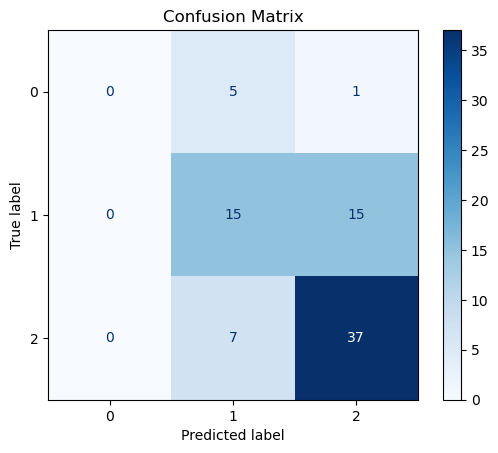

In [ ]:
# Summary and Plots
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

performance_summary = {}
if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "mse": mse,
        "r2_score": r2,
        "pearson_corr": pearson_corr
    }
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    class_names = ["Low potency", "Medium potency", "High potency"]
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.show()

# Assuming you have softmax probs
model.eval()
y_true = []
y_probs = []

with torch.no_grad():
    for batch in test_loader:
        out = model(batch)
        probs = F.softmax(out, dim=1)  # Convert logits to probabilities
        y_probs.append(probs.cpu())
        y_true.append(batch.y.cpu())

y_probs = torch.cat(y_probs).numpy()
y_true = torch.cat(y_true).numpy()

auc_score = roc_auc_score(y_true, y_probs, multi_class='ovr')
print(f"AUC-ROC (OVR): {auc_score:.4f}")

# Save summaries
performance_df = pd.DataFrame([performance_summary])
performance_df.to_csv(f"{file_prefix}_performance_summary.csv", index=False)
predictions_df = pd.DataFrame({"True": y_true, "Predicted": y_pred})
predictions_df.to_csv(f"{file_prefix}_predictions.csv", index=False)


In [3]:

import os
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Task Config ---
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
class_names = ["Low potency", "Medium potency", "High potency"] if task == "classification" else None

# --- Model Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training and Evaluation Helpers ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                y_true.extend(batch.y.cpu().numpy())
                y_pred.extend(out.squeeze().cpu().numpy())
            else:
                probs = F.softmax(out, dim=1)
                preds = probs.argmax(dim=1)
                y_probs.extend(probs.cpu().numpy())
                y_true.extend(batch.y.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())
    return y_true, y_pred, y_probs if task == "classification" else None

def plot_and_save_results(y_true, y_pred, y_probs, fold, prefix):
    os.makedirs(os.path.dirname(prefix), exist_ok=True)
    if task == "regression":
        from sklearn.metrics import mean_squared_error, r2_score
        from scipy.stats import pearsonr

        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        pearson_corr, _ = pearsonr(y_true, y_pred)

        pd.DataFrame([{
            "fold": fold, "mse": mse, "r2": r2, "pearson": pearson_corr
        }]).to_csv(f"{prefix}_performance_summary.csv", index=False)

        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.title("Predicted vs True")
        plt.savefig(f"{prefix}_pred_vs_true.png")
        plt.close()

    else:
        from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay

        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="weighted", zero_division=0
        )
        auc = roc_auc_score(y_true, y_probs, multi_class="ovr")

        pd.DataFrame([{
            "fold": fold, "accuracy": accuracy, "precision": precision,
            "recall": recall, "f1_score": f1, "roc_auc": auc
        }]).to_csv(f"{prefix}_performance_summary.csv", index=False)

        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap="Blues")
        plt.title("Confusion Matrix")
        plt.savefig(f"{prefix}_confusion_matrix.png")
        plt.close()

# --- Main 5-Fold Cross-Validation Loop ---
for fold in range(5):
    print(f"\n🔁 Fold {fold + 1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(1, 200):
        train_loss = train(model, train_loader, optimizer)
        y_true_val, y_pred_val, _ = evaluate(model, val_loader)
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Fold {fold+1} Val Example: {y_pred_val[:5]}")

    y_true, y_pred, y_probs = evaluate(model, test_loader)
    prefix = f"MPNN_results/mpnn_fold{fold}_{task}"
    plot_and_save_results(y_true, y_pred, y_probs, fold, prefix)

print("\n✅ All folds complete and evaluation summaries saved.")



🔁 Fold 1/5
Epoch 1 | Train Loss: 0.8896 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 2 | Train Loss: 0.8943 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 3 | Train Loss: 0.8750 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 4 | Train Loss: 0.8706 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 5 | Train Loss: 0.8841 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 6 | Train Loss: 0.8643 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 7 | Train Loss: 0.8668 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 8 | Train Loss: 0.8479 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 9 | Train Loss: 0.8487 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 10 | Train Loss: 0.8301 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 11 | Train Loss: 0.8096 | Fold 1 Val Example: [1, 2, 1, 2, 2]
Epoch 12 | Train Loss: 0.8011 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 13 | Train Loss: 0.8389 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 14 | Train Loss: 0.8472 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 15 | Train Loss: 0.8034 | Fold 1 Val Ex

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_squared_error, r2_score, precision_recall_fscore_support,
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, auc
)
from scipy.stats import pearsonr

# --- 🔧 Settings ---
task = "classification"  # "classification" or "regression"

import os

# 🗂️ Create results/ folder path based on task
base_dir = f"MPNN_results/{task}"
os.makedirs(base_dir, exist_ok=True)
file_prefix = os.path.join(base_dir, f"MPNN_{task}")

file_prefix = f"MPNN_{task}"
model_type = "MPNN"
input_type = "graph"
class_names = ["Low potency", "Medium potency", "High potency"]  # For classification only

# --- 🧠 Inference: Ensure consistent predictions ---
model.eval()
y_true = []
y_pred = []
y_probs = []

with torch.no_grad():
    for batch in test_loader:
        out = model(batch)
        if task == "classification":
            probs = F.softmax(out, dim=1)
            pred = probs.argmax(dim=1)
            y_probs.append(probs.cpu())
        else:
            pred = out.squeeze()
        y_pred.append(pred.cpu())
        y_true.append(batch.y.cpu())

# --- 🧹 Convert to arrays ---
y_true = torch.cat(y_true).numpy()
y_pred = torch.cat(y_pred).numpy()
if task == "classification":
    y_probs = torch.cat(y_probs).numpy()

# --- 📊 Evaluation ---
performance_summary = {}

if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)

    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "mse": mse,
        "r2_score": r2,
        "pearson_corr": pearson_corr
    }

    # 📈 Scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.tight_layout()
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:  # Classification
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )

    performance_summary = {
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    # 🔷 Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.close()

    # 🔵 AUC-ROC (Multiclass OvR)
    y_true_onehot = np.zeros_like(y_probs)
    y_true_onehot[np.arange(len(y_true)), y_true] = 1

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 6))
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass AUC-ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"{file_prefix}_auc_roc_curve.png")
    plt.close()

    overall_auc = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"✅ Overall AUC-ROC (OvR): {overall_auc:.4f}")

# 📁 Save predictions
predictions_df = pd.DataFrame({
    "True": y_true,
    "Predicted": y_pred
})
#predictions_df.to_csv(f"{file_prefix}_predictions.csv", index=False)

# 📁 Save performance summary
#pd.DataFrame([performance_summary]).to_csv(f"{file_prefix}_performance_summary.csv", index=False)
performance_df.to_csv(f"{file_prefix}_performance_summary.csv", index=False)
predictions_df.to_csv(f"{file_prefix}_predictions.csv", index=False)

✅ Overall AUC-ROC (OvR): 0.7621


NameError: name 'performance_df' is not defined

In [6]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from torch.nn import Linear
import os

# 🛠️ Configuration
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
num_epochs = 100
batch_size = 32
model_type = "MPNN"
input_type = "graph"

# 📊 Storage
fold_train_losses = []
fold_val_scores = []
fold_test_scores = []

# --- MPNN Layer ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- Full MPNN ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# --- Evaluation ---
def evaluate(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            if task == "regression":
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
            else:
                pred = out.argmax(dim=1)
                correct += int((pred == batch.y).sum())
                total += batch.y.size(0)
    return total_loss / len(loader) if task == "regression" else correct / total

# --- Main 5-Fold Loop ---
for fold in range(5):
    print(f"\n🔁 Fold {fold+1}/5")

    # 🔁 Load fold data
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data   = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data  = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    # 🧠 Model Setup
    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_scores = []

    for epoch in range(1, num_epochs + 1):
        train_loss = train(model, train_loader, optimizer)
        val_score = evaluate(model, val_loader)
        train_losses.append(train_loss)
        val_scores.append(val_score)

        example_preds = torch.cat([model(batch).argmax(dim=1).cpu() for batch in val_loader])[:5] if task == "classification" else []
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Fold {fold+1} Val Example: {example_preds.tolist() if task == 'classification' else f'{val_score:.4f}'}")

    # 📦 Evaluate on test set
    test_score = evaluate(model, test_loader)
    print(f"✅ Fold {fold + 1} | {'Test MSE' if task == 'regression' else 'Test Accuracy'}: {test_score:.4f}")

    fold_train_losses.append(train_losses)
    fold_val_scores.append(val_scores)
    fold_test_scores.append(test_score)

# 🧾 Results are now ready for plotting or evaluation (in separate script)



🔁 Fold 1/5
Epoch 1 | Train Loss: 0.9458 | Fold 1 Val Example: [1, 1, 1, 1, 1]
Epoch 2 | Train Loss: 0.9100 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 3 | Train Loss: 0.8853 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 4 | Train Loss: 0.9107 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 5 | Train Loss: 0.8673 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 6 | Train Loss: 0.8512 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 7 | Train Loss: 0.8533 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 8 | Train Loss: 0.8767 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 9 | Train Loss: 0.8520 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 10 | Train Loss: 0.8539 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 11 | Train Loss: 0.8422 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 12 | Train Loss: 0.8584 | Fold 1 Val Example: [1, 2, 1, 1, 2]
Epoch 13 | Train Loss: 0.8477 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 14 | Train Loss: 0.8289 | Fold 1 Val Example: [2, 2, 2, 2, 2]
Epoch 15 | Train Loss: 0.8286 | Fold 1 Val Ex

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc,
    mean_squared_error, r2_score
)
from scipy.stats import pearsonr
from sklearn.preprocessing import label_binarize

# --- Configuration ---
task = "classification"  # or "regression"
file_prefix = f"MPNN_results/mpnn_{task}"
model_type = "MPNN"
input_type = "graph"

# --- Model Evaluation ---
model.eval()
y_true = []
y_probs = []
y_preds = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)

        if task == "classification":
            probs = F.softmax(out, dim=1)
            preds = probs.argmax(dim=1)
            y_probs.append(probs.cpu())
            y_preds.append(preds.cpu())
        else:  # regression
            preds = out.squeeze()
            y_preds.append(preds.cpu())

        y_true.append(batch.y.cpu())

# --- Convert to NumPy arrays ---
y_true = torch.cat(y_true).numpy()
y_pred = torch.cat(y_preds).numpy()

# --- Metrics & Outputs ---
if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)

    performance_summary = pd.DataFrame([{
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "mse": mse,
        "r2_score": r2,
        "pearson_corr": pearson_corr
    }])
    performance_summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)

    # Scatter plot: Predicted vs True
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--")
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:
    y_probs = torch.cat(y_probs).numpy()
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )

    performance_summary = pd.DataFrame([{
        "model_type": model_type,
        "problem_type": task,
        "input_type": input_type,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }])
    performance_summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)

    predictions = pd.DataFrame({
        "True": y_true,
        "Predicted": y_pred
    })
    predictions.to_csv(f"{file_prefix}_predictions.csv", index=False)

    # Confusion Matrix
    class_names = ["Low potency", "Medium potency", "High potency"]
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.close()

    # AUC-ROC Curve
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(y_true_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(y_true_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve (Multiclass)")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"{file_prefix}_auc_roc_curve.png")
    plt.close()


NameError: name 'device' is not defined

random split training

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, ConfusionMatrixDisplay,
                             mean_squared_error, r2_score, roc_auc_score)
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Task Selection ---
task = "classification"  # or "regression"
model_type = "MPNN"
input_type = "graph"
file_prefix = f"{task}_{model_type}_results"

# --- Load Data ---
base_path = f"../4_train_test_split/random_split/{task}/"
train_data = torch.load(os.path.join(base_path, f"{task}_train.pt"))
val_data = torch.load(os.path.join(base_path, f"{task}_val.pt"))
test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# --- Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- MPNN Layer ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- Full MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Setup ---
input_dim = train_data[0].x.size(1)
edge_dim = train_data[0].edge_attr.size(1)
output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

model = MPNN(input_dim=input_dim, edge_dim=edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --- Training Loop ---
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# --- Evaluation ---
def evaluate(loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            if task == "regression":
                y_pred.append(out.squeeze().cpu())
                y_true.append(batch.y.cpu())
            else:
                probs = F.softmax(out, dim=1)
                preds = probs.argmax(dim=1)
                y_probs.append(probs.cpu())
                y_pred.append(preds.cpu())
                y_true.append(batch.y.cpu())
    return torch.cat(y_true), torch.cat(y_pred), torch.cat(y_probs) if y_probs else None

# --- Run Training ---
train_losses, val_scores = [], []
for epoch in range(1, 101):
    loss = train()
    y_true_val, y_pred_val, _ = evaluate(val_loader)
    score = mean_squared_error(y_true_val, y_pred_val) if task == "regression" else accuracy_score(y_true_val, y_pred_val)
    train_losses.append(loss)
    val_scores.append(score)
    print(f"Epoch {epoch:03d} | Train Loss: {loss:.4f} | {'Val MSE' if task=='regression' else 'Val Acc'}: {score:.4f}")

# --- Final Test Evaluation ---
y_true, y_pred, y_probs = evaluate(test_loader)

# --- Metrics and Plots ---
if task == "regression":
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    summary = pd.DataFrame([{
        "model_type": model_type, "problem_type": task, "input_type": input_type,
        "mse": mse, "r2_score": r2, "pearson_corr": pearson_corr
    }])
    summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)
    
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("True IC50")
    plt.ylabel("Predicted IC50")
    plt.title("Predicted vs True")
    plt.savefig(f"{file_prefix}_predicted_vs_true.png")
    plt.close()

else:
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr') if y_probs is not None else None

    summary = pd.DataFrame([{
        "model_type": model_type, "problem_type": task, "input_type": input_type,
        "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1, "auc_roc": auc
    }])
    summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.savefig(f"{file_prefix}_confusion_matrix.png")
    plt.close()

    if y_probs is not None:
        plt.figure()
        for i in range(y_probs.shape[1]):
            fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_probs[:, i])
            plt.plot(fpr, tpr, label=f"Class {i}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("AUC-ROC Curve")
        plt.legend()
        plt.savefig(f"{file_prefix}_auc_roc.png")
        plt.close()

# Save predictions
y_df = pd.DataFrame({"True": y_true.numpy(), "Predicted": y_pred.numpy()})
y_df.to_csv(f"{file_prefix}_predictions.csv", index=False)


5fold_training

In [11]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
from torch.nn import Linear
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, mean_squared_error, r2_score
)
from scipy.stats import pearsonr

# --- Task and Setup ---
task = "classification"  # or "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
file_prefix = f"MPNN_{task}_5fold"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- MPNN Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Train & Evaluate ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.mse_loss(out.squeeze(), batch.y.float()) if task == "regression" else F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, return_preds=False):
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    total_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            if task == "regression":
                total_loss += F.mse_loss(out.squeeze(), batch.y.float()).item()
                if return_preds:
                    all_preds.append(out.squeeze().cpu())
                    all_labels.append(batch.y.cpu())
            else:
                probs = F.softmax(out, dim=1)
                pred = probs.argmax(dim=1)
                correct += int((pred == batch.y).sum())
                total += batch.y.size(0)
                if return_preds:
                    all_probs.append(probs.cpu())
                    all_preds.append(pred.cpu())
                    all_labels.append(batch.y.cpu())

    if return_preds:
        return (torch.cat(all_preds), torch.cat(all_labels), torch.cat(all_probs) if all_probs else None)

    return total_loss / len(loader) if task == "regression" else correct / total

# --- Main Training Loop ---
fold_train_losses = []
fold_val_scores = []
fold_test_scores = []
fold_metrics = []

for fold in range(5):
    print(f"\n🔁 Fold {fold + 1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)
    test_loader = DataLoader(test_data, batch_size=32)

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = 1 if task == "regression" else len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_scores = [], []
    for epoch in range(1, 500):
        loss = train(model, train_loader, optimizer)
        val_score = evaluate(model, val_loader)
        train_losses.append(loss)
        val_scores.append(val_score)
        print(f"Epoch {epoch:>3} | Train Loss: {loss:.4f} | {'Val MSE' if task=='regression' else 'Val Acc'}: {val_score:.4f}")

    # Final test predictions
    y_pred, y_true, y_probs = evaluate(model, test_loader, return_preds=True)
    print(f"✅ Fold {fold + 1} Test {'MSE' if task=='regression' else 'Accuracy'}: {evaluate(model, test_loader):.4f}")

    if task == "regression":
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        pearson_corr, _ = pearsonr(y_true, y_pred)
        fold_metrics.append({"fold": fold+1, "mse": mse, "r2": r2, "pearson": pearson_corr})
        plt.figure(figsize=(5,5))
        plt.scatter(y_true, y_pred, alpha=0.6)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.title(f"Fold {fold+1} - Predicted vs True")
        plt.tight_layout()
        plt.savefig(f"{file_prefix}_fold{fold+1}_regression.png")
        plt.close()

    else:
        acc = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        auc = roc_auc_score(y_true, y_probs, multi_class='ovr')
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
        disp.plot(cmap="Blues")
        plt.title(f"Fold {fold+1} - Confusion Matrix")
        plt.savefig(f"{file_prefix}_fold{fold+1}_conf_matrix.png")
        plt.close()

        fold_metrics.append({"fold": fold+1, "accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "auc": auc})

    # Save per-fold scores
    fold_train_losses.append(train_losses)
    fold_val_scores.append(val_scores)

# --- Final Summary ---
summary_df = pd.DataFrame(fold_metrics)
summary_df.to_csv(f"{file_prefix}_fold_metrics.csv", index=False)
print("\n📊 Final Summary:\n", summary_df.describe())

# Plot all folds’ training loss and val accuracy/MSE
for i in range(5):
    plt.plot(fold_train_losses[i], label=f"Fold {i+1}")
plt.title("Training Loss per Fold")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig(f"{file_prefix}_training_loss_all_folds.png")
plt.close()

for i in range(5):
    plt.plot(fold_val_scores[i], label=f"Fold {i+1}")
plt.title("Validation Metric per Fold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy" if task == "classification" else "MSE")
plt.legend()
plt.tight_layout()
plt.savefig(f"{file_prefix}_val_metric_all_folds.png")
plt.close()



🔁 Fold 1/5
Epoch   1 | Train Loss: 0.8960 | Val Acc: 0.4556
Epoch   2 | Train Loss: 0.8745 | Val Acc: 0.4556
Epoch   3 | Train Loss: 0.9014 | Val Acc: 0.4556
Epoch   4 | Train Loss: 0.8606 | Val Acc: 0.4556
Epoch   5 | Train Loss: 0.8885 | Val Acc: 0.4556
Epoch   6 | Train Loss: 0.8526 | Val Acc: 0.4556
Epoch   7 | Train Loss: 0.8396 | Val Acc: 0.4556
Epoch   8 | Train Loss: 0.8517 | Val Acc: 0.4556
Epoch   9 | Train Loss: 0.8596 | Val Acc: 0.5222
Epoch  10 | Train Loss: 0.8429 | Val Acc: 0.4556
Epoch  11 | Train Loss: 0.8533 | Val Acc: 0.5000
Epoch  12 | Train Loss: 0.8245 | Val Acc: 0.7444
Epoch  13 | Train Loss: 0.8240 | Val Acc: 0.7000
Epoch  14 | Train Loss: 0.8290 | Val Acc: 0.5889
Epoch  15 | Train Loss: 0.7867 | Val Acc: 0.7556
Epoch  16 | Train Loss: 0.7872 | Val Acc: 0.7333
Epoch  17 | Train Loss: 0.8106 | Val Acc: 0.7667
Epoch  18 | Train Loss: 0.7746 | Val Acc: 0.7333
Epoch  19 | Train Loss: 0.7703 | Val Acc: 0.7333
Epoch  20 | Train Loss: 0.7456 | Val Acc: 0.7333
Epoch  2

In [13]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_recall_fscore_support,
                             roc_auc_score)
import seaborn as sns

# --- Task & Paths ---
task = "classification"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# --- MPNN Layer ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training and Evaluation Functions ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    logits = torch.cat(preds)
    y_pred = logits.argmax(dim=1).numpy()
    y_true = torch.cat(labels).numpy()
    return y_true, y_pred, logits

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Storage for Fold-wise Metrics ---
all_fold_metrics = []
all_train_losses = []
all_val_accuracies = []

# --- 5-Fold Cross-Validation ---
for fold in range(5):
    print(f"\n🔁 Fold {fold+1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)
    test_loader = DataLoader(test_data, batch_size=32)

    train_losses, val_scores = [], []

    for epoch in range(1, 51):
        loss = train(model, train_loader, optimizer)
        y_val_true, y_val_pred, _ = evaluate(model, val_loader)
        val_acc = accuracy_score(y_val_true, y_val_pred)
        train_losses.append(loss)
        val_scores.append(val_acc)
        print(f"Epoch {epoch:03d} | Train Loss: {loss:.4f} | Val Acc: {val_acc:.4f}")

    # --- Final Test Evaluation ---
    y_test_true, y_test_pred, y_test_logits = evaluate(model, test_loader)
    acc = accuracy_score(y_test_true, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_true, y_test_pred, average="weighted", zero_division=0)
    auc = roc_auc_score(y_test_true, F.softmax(y_test_logits, dim=1).numpy(), multi_class="ovr")

    all_fold_metrics.append({
        "fold": fold+1, "accuracy": acc, "precision": precision,
        "recall": recall, "f1_score": f1, "auc_roc": auc
    })

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test_true, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
    disp.plot(cmap="Blues")
    plt.title(f"Fold {fold+1} Confusion Matrix")
    plt.savefig(f"{results_dir}/fold{fold+1}_confusion_matrix.png")
    plt.close()

    # --- Save fold plots ---
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_scores, label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss / Accuracy")
    plt.legend()
    plt.title(f"Fold {fold+1} Training Curve")
    plt.savefig(f"{results_dir}/fold{fold+1}_train_val_plot.png")
    plt.close()

    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_scores)

    # Save predictions
    pd.DataFrame({"True": y_test_true, "Pred": y_test_pred}).to_csv(f"{results_dir}/fold{fold+1}_predictions.csv", index=False)

# --- Final Summary ---
metrics_df = pd.DataFrame(all_fold_metrics)
metrics_df.to_csv(os.path.join(results_dir, "crossval_summary.csv"), index=False)
print("\n📊 Final Cross-Validation Metrics:")
print(metrics_df.mean(numeric_only=True))

# --- Plot All Folds Together ---
plt.figure(figsize=(8,5))
for i in range(5):
    plt.plot(all_train_losses[i], label=f"Fold {i+1} Train")
    plt.plot(all_val_accuracies[i], label=f"Fold {i+1} Val")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.title("Training/Validation Curves Across Folds")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "all_folds_train_val.png"))
plt.close()



🔁 Fold 1/5
Epoch 001 | Train Loss: 0.9416 | Val Acc: 0.4556
Epoch 002 | Train Loss: 0.8701 | Val Acc: 0.4556
Epoch 003 | Train Loss: 0.8676 | Val Acc: 0.4556
Epoch 004 | Train Loss: 0.8619 | Val Acc: 0.4556
Epoch 005 | Train Loss: 0.8778 | Val Acc: 0.4556
Epoch 006 | Train Loss: 0.8714 | Val Acc: 0.4556
Epoch 007 | Train Loss: 0.8724 | Val Acc: 0.4556
Epoch 008 | Train Loss: 0.8462 | Val Acc: 0.4556
Epoch 009 | Train Loss: 0.8563 | Val Acc: 0.4556
Epoch 010 | Train Loss: 0.8580 | Val Acc: 0.4556
Epoch 011 | Train Loss: 0.8686 | Val Acc: 0.7111
Epoch 012 | Train Loss: 0.8353 | Val Acc: 0.4556
Epoch 013 | Train Loss: 0.8534 | Val Acc: 0.4556
Epoch 014 | Train Loss: 0.8318 | Val Acc: 0.5778
Epoch 015 | Train Loss: 0.8829 | Val Acc: 0.7000
Epoch 016 | Train Loss: 0.8869 | Val Acc: 0.4556
Epoch 017 | Train Loss: 0.8499 | Val Acc: 0.5000
Epoch 018 | Train Loss: 0.8170 | Val Acc: 0.5444
Epoch 019 | Train Loss: 0.8110 | Val Acc: 0.4889
Epoch 020 | Train Loss: 0.8229 | Val Acc: 0.5222
Epoch 02

In [23]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_recall_fscore_support,
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize
import seaborn as sns

# --- Task & Paths ---
task = "regression"
base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# --- MPNN Layer ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

# --- MPNN Model ---
class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Training and Evaluation Functions ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    logits = torch.cat(preds)
    y_pred = logits.argmax(dim=1).numpy()
    y_true = torch.cat(labels).numpy()
    return y_true, y_pred, logits

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Storage for Fold-wise Metrics ---
all_fold_metrics = []
all_train_losses = []
all_val_accuracies = []
all_y_true, all_y_pred, all_y_probs = [], [], []

# --- 5-Fold Cross-Validation ---
for fold in range(5):
    print(f"\n🔁 Fold {fold+1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

    input_dim = train_data[0].x.size(1)
    edge_dim = train_data[0].edge_attr.size(1)
    output_dim = len(torch.unique(torch.cat([d.y for d in train_data])))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)
    test_loader = DataLoader(test_data, batch_size=32)

    train_losses, val_scores = [], []

    for epoch in range(1, 500):
        loss = train(model, train_loader, optimizer)
        y_val_true, y_val_pred, _ = evaluate(model, val_loader)
        val_acc = accuracy_score(y_val_true, y_val_pred)
        train_losses.append(loss)
        val_scores.append(val_acc)
        print(f"Epoch {epoch:03d} | Train Loss: {loss:.4f} | Val Acc: {val_acc:.4f}")

    # Final Test Evaluation
    y_test_true, y_test_pred, y_test_logits = evaluate(model, test_loader)
    y_test_probs = F.softmax(y_test_logits, dim=1).numpy()

    acc = accuracy_score(y_test_true, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_true, y_test_pred, average="weighted", zero_division=0)
    auc_val = roc_auc_score(y_test_true, y_test_probs, multi_class="ovr")

    all_fold_metrics.append({
        "fold": fold+1, "accuracy": acc, "precision": precision,
        "recall": recall, "f1_score": f1, "auc_roc": auc_val
    })

    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_scores)
    all_y_true.extend(y_test_true)
    all_y_pred.extend(y_test_pred)
    all_y_probs.extend(y_test_probs)

    pd.DataFrame({"True": y_test_true, "Pred": y_test_pred}).to_csv(f"{results_dir}/fold{fold+1}_predictions.csv", index=False)

# --- Final Summary ---
metrics_df = pd.DataFrame(all_fold_metrics)
metrics_df.to_csv(os.path.join(results_dir, "crossval_summary.csv"), index=False)
print("\n📊 Final Cross-Validation Metrics:")
print(metrics_df.mean(numeric_only=True))

# --- Combined Confusion Matrix ---
cm_combined = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_combined)
disp.plot(cmap="Blues")
plt.title("Combined Confusion Matrix")
plt.savefig(os.path.join(results_dir, "combined_confusion_matrix.png"))
plt.close()

# --- Combined AUC-ROC Plot ---
n_classes = output_dim
y_true_bin = label_binarize(all_y_true, classes=np.arange(n_classes))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], np.array(all_y_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (Combined)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "combined_auc_roc.png"))
plt.close()

# --- Training/Validation Curves Across Folds ---
plt.figure(figsize=(8,5))
for i in range(5):
    plt.plot(all_train_losses[i], label=f"Fold {i+1} Train")
    plt.plot(all_val_accuracies[i], label=f"Fold {i+1} Val")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.title("Training/Validation Curves Across Folds")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "all_folds_train_val.png"))
plt.close()



🔁 Fold 1/5


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [25]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import label_binarize

# --- Task Setup ---
task = "regression"  # "regression" or "classification"
num_classes = 3  # Only used for classification
class_names = {0: "Low", 1: "Medium", 2: "High"}

# --- Paths ---
base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- MPNN Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Helper Functions ---
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        if task == "classification":
            loss = F.cross_entropy(out, batch.y.long())
        else:
            loss = F.mse_loss(out.squeeze(), batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    outputs = torch.cat(preds)
    targets = torch.cat(labels)
    return outputs, targets

# --- Load Final Train+Val and Test Data ---
all_trainval = []
for fold in range(5):
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    all_trainval.extend(train_data)
    all_trainval.extend(val_data)


test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

input_dim = all_trainval[0].x.size(1)
edge_dim = all_trainval[0].edge_attr.size(1)
output_dim = num_classes if task == "classification" else 1

model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(all_trainval, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# --- Train Final Model ---
for epoch in range(1, 101):
    loss = train(model, train_loader, optimizer)
    print(f"[Final Model] Epoch {epoch:03d} | Loss: {loss:.4f}")

# --- Evaluate on Test Set ---
outputs, targets = evaluate(model, test_loader)

if task == "classification":
    y_probs = F.softmax(outputs, dim=1).numpy()
    y_pred = outputs.argmax(dim=1).numpy()
    y_true = targets.numpy().astype(int)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    auc_val = roc_auc_score(y_true_bin, y_probs, multi_class="ovr")

    final_metrics = pd.DataFrame([{
        "accuracy": acc, "precision": precision,
        "recall": recall, "f1_score": f1, "auc_roc": auc_val
    }])
    final_metrics.to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False
    )

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_names[i] for i in range(num_classes)])
    disp.plot(cmap="Blues")
    plt.title("Final Model - Confusion Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_confusion_matrix.png"))
    plt.close()

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7, 5))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Final Model - AUC-ROC")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_auc_roc.png"))
    plt.close()

    if os.path.exists(os.path.join(results_dir, "crossval_summary.csv")):
        cv_df = pd.read_csv(os.path.join(results_dir, "crossval_summary.csv"))
        cv_avg = cv_df.mean(numeric_only=True)
        cv_std = cv_df.std(numeric_only=True)

        comparison_df = pd.DataFrame({
            "Metric": cv_avg.index,
            "CV_Mean": cv_avg.values,
            "CV_Std": cv_std.values,
            "Final_Model": final_metrics.iloc[0].values
        })
        comparison_df.to_csv(os.path.join(results_dir, "final_vs_cv_comparison.csv"), index=False)

        # FIX: Avoid naming conflict by renaming this list
        metric_names = ["accuracy", "precision", "recall", "f1_score", "auc_roc"]
        x = np.arange(len(metric_names))
        width = 0.35
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.bar(x - width/2, comparison_df["CV_Mean"], width, yerr=comparison_df["CV_Std"], capsize=5, label='CV Mean')
        ax.bar(x + width/2, comparison_df["Final_Model"], width, label='Final Model')
        ax.set_ylabel('Score')
        ax.set_title('Final Model vs Cross-Validation')
        ax.set_xticks(x)
        ax.set_xticklabels(metric_names)
        ax.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(results_dir, "final_vs_cv_barplot.png"))
        plt.close()

else:  # Regression
    y_true = targets.numpy()
    y_pred = outputs.squeeze().numpy()
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    final_metrics = pd.DataFrame([{
        "mae": mae, "mse": mse, "rmse": rmse, "r2": r2
    }])
    final_metrics.to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False
    )

    print("\n📊 Final Regression Metrics:")
    print(final_metrics.T)

torch.save(model.state_dict(), os.path.join(results_dir, "final_model.pt"))
print("\n✅ Final model training and evaluation completed.")


[Final Model] Epoch 001 | Loss: 5.1754
[Final Model] Epoch 002 | Loss: 0.9851
[Final Model] Epoch 003 | Loss: 0.9802
[Final Model] Epoch 004 | Loss: 0.9523
[Final Model] Epoch 005 | Loss: 0.9508
[Final Model] Epoch 006 | Loss: 0.9611
[Final Model] Epoch 007 | Loss: 0.9431
[Final Model] Epoch 008 | Loss: 0.9795
[Final Model] Epoch 009 | Loss: 0.9428
[Final Model] Epoch 010 | Loss: 0.9654
[Final Model] Epoch 011 | Loss: 0.9558
[Final Model] Epoch 012 | Loss: 0.9332
[Final Model] Epoch 013 | Loss: 0.9243
[Final Model] Epoch 014 | Loss: 0.9115
[Final Model] Epoch 015 | Loss: 0.8845
[Final Model] Epoch 016 | Loss: 0.8762
[Final Model] Epoch 017 | Loss: 0.8760
[Final Model] Epoch 018 | Loss: 0.8408
[Final Model] Epoch 019 | Loss: 0.8652
[Final Model] Epoch 020 | Loss: 0.8747
[Final Model] Epoch 021 | Loss: 0.8613
[Final Model] Epoch 022 | Loss: 0.8714
[Final Model] Epoch 023 | Loss: 0.8691
[Final Model] Epoch 024 | Loss: 0.8521
[Final Model] Epoch 025 | Loss: 0.8786
[Final Model] Epoch 026 |

In [20]:
# This script enhances the previous training script with:
# - Early stopping based on validation loss
# - Learning rate scheduling (ReduceLROnPlateau)
# - Saving only the best model weights

import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import label_binarize

# --- Task Setup ---
task = "classification"  # "regression" or "classification"
num_classes = 3
class_names = {0: "Low", 1: "Medium", 2: "High"}

base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# --- MPNN Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Load Data ---
all_trainval = []
for fold in range(5):
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    all_trainval.extend(train_data)
    all_trainval.extend(val_data)

test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

input_dim = all_trainval[0].x.size(1)
edge_dim = all_trainval[0].edge_attr.size(1)
output_dim = num_classes if task == "classification" else 1

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

train_loader = DataLoader(all_trainval, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# --- Training with Early Stopping ---
def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    outputs = torch.cat(preds)
    targets = torch.cat(labels)
    return outputs, targets

best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(1, 101):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y.long()) if task == "classification" else F.mse_loss(out.squeeze(), batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_loss = total_loss / len(train_loader)

    # Validation on the test set (since we merged train+val)
    outputs, targets = evaluate(model, test_loader)
    val_loss = F.cross_entropy(outputs, targets.long()).item() if task == "classification" else F.mse_loss(outputs.squeeze(), targets).item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), os.path.join(results_dir, "best_model.pt"))
        print("\t🔁 Saved new best model.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered.")
            break

print("\n✅ Training complete. Loading best model.")
model.load_state_dict(torch.load(os.path.join(results_dir, "best_model.pt")))


Epoch 001 | Train Loss: 0.8812 | Val Loss: 0.8469
	🔁 Saved new best model.
Epoch 002 | Train Loss: 0.8430 | Val Loss: 0.8310
	🔁 Saved new best model.
Epoch 003 | Train Loss: 0.7900 | Val Loss: 0.8160
	🔁 Saved new best model.
Epoch 004 | Train Loss: 0.7780 | Val Loss: 0.7684
	🔁 Saved new best model.
Epoch 005 | Train Loss: 0.7476 | Val Loss: 0.7655
	🔁 Saved new best model.
Epoch 006 | Train Loss: 0.7347 | Val Loss: 0.7318
	🔁 Saved new best model.
Epoch 007 | Train Loss: 0.7240 | Val Loss: 0.7405
Epoch 008 | Train Loss: 0.7190 | Val Loss: 0.7309
	🔁 Saved new best model.
Epoch 009 | Train Loss: 0.7103 | Val Loss: 0.7629
Epoch 010 | Train Loss: 0.7173 | Val Loss: 0.7248
	🔁 Saved new best model.
Epoch 011 | Train Loss: 0.7094 | Val Loss: 0.7282
Epoch 012 | Train Loss: 0.7014 | Val Loss: 0.7201
	🔁 Saved new best model.
Epoch 013 | Train Loss: 0.7080 | Val Loss: 0.7183
	🔁 Saved new best model.
Epoch 014 | Train Loss: 0.7047 | Val Loss: 0.7214
Epoch 015 | Train Loss: 0.6891 | Val Loss: 0.7175


<All keys matched successfully>

In [22]:
# This script enhances the previous training script with:
# - Early stopping based on validation loss
# - Learning rate scheduling (ReduceLROnPlateau)
# - Saving only the best model weights
# - Internal stratified/random validation split from merged train+val
# - Full test evaluation with metrics and plots

import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import random

# --- Reproducibility ---
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# --- Task Setup ---
task = "regression"  # "regression" or "classification"
num_classes = 3
class_names = {0: "Low", 1: "Medium", 2: "High"}

base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# --- MPNN Definition ---
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# --- Load Data ---
all_trainval = []
for fold in range(5):
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    all_trainval.extend(train_data)
    all_trainval.extend(val_data)

test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

# --- Split out a small validation set ---
if task == "classification":
    labels = [int(d.y.item()) for d in all_trainval]
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=seed)
    train_idx, val_idx = next(sss.split(all_trainval, labels))
else:
    train_idx, val_idx = train_test_split(range(len(all_trainval)), test_size=0.1, random_state=seed)

train_split = [all_trainval[i] for i in train_idx]
val_split = [all_trainval[i] for i in val_idx]

print(f"📊 Final split: Train={len(train_split)}, Val={len(val_split)}, Test={len(test_data)}")

input_dim = all_trainval[0].x.size(1)
edge_dim = all_trainval[0].edge_attr.size(1)
output_dim = num_classes if task == "classification" else 1

# --- Model Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

train_loader = DataLoader(train_split, batch_size=32, shuffle=True)
val_loader = DataLoader(val_split, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# --- Training Functions ---
def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    outputs = torch.cat(preds)
    targets = torch.cat(labels)
    return outputs, targets

best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(1, 101):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y.long()) if task == "classification" else F.mse_loss(out.squeeze(), batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_loss = total_loss / len(train_loader)

    outputs, targets = evaluate(model, val_loader)
    val_loss = F.cross_entropy(outputs, targets.long()).item() if task == "classification" else F.mse_loss(outputs.squeeze(), targets).item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), os.path.join(results_dir, "best_model.pt"))
        print("\t🔁 Saved new best model.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered.")
            break

print("\n✅ Training complete. Loading best model.")
model.load_state_dict(torch.load(os.path.join(results_dir, "best_model.pt")))

# --- Final Evaluation ---
outputs, targets = evaluate(model, test_loader)

if task == "classification":
    y_probs = F.softmax(outputs, dim=1).numpy()
    y_pred = outputs.argmax(dim=1).numpy()
    y_true = targets.numpy().astype(int)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    auc_val = roc_auc_score(y_true_bin, y_probs, multi_class="ovr")

    pd.DataFrame([{
        "accuracy": acc, "precision": precision,
        "recall": recall, "f1_score": f1, "auc_roc": auc_val
    }]).to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_names[i] for i in range(num_classes)])
    disp.plot(cmap="Blues")
    plt.title("Final Model - Confusion Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_confusion_matrix.png"))
    plt.close()

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7, 5))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Final Model - AUC-ROC")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_auc_roc.png"))
    plt.close()

else:
    y_true = targets.numpy()
    y_pred = outputs.squeeze().numpy()
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    pd.DataFrame([{
        "mae": mae, "mse": mse, "rmse": rmse, "r2": r2
    }]).to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False)

    print("\n📊 Final Regression Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


📊 Final split: Train=2020, Val=225, Test=80


/Users/dolapo/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 001 | Train Loss: 5.2550 | Val Loss: 0.8831
	🔁 Saved new best model.
Epoch 002 | Train Loss: 1.0323 | Val Loss: 0.8028
	🔁 Saved new best model.
Epoch 003 | Train Loss: 1.0271 | Val Loss: 0.7965
	🔁 Saved new best model.
Epoch 004 | Train Loss: 0.9870 | Val Loss: 0.7934
	🔁 Saved new best model.
Epoch 005 | Train Loss: 0.9912 | Val Loss: 0.9068
Epoch 006 | Train Loss: 0.9745 | Val Loss: 0.7887
	🔁 Saved new best model.
Epoch 007 | Train Loss: 0.9702 | Val Loss: 0.7957
Epoch 008 | Train Loss: 0.9988 | Val Loss: 1.1288
Epoch 009 | Train Loss: 0.9896 | Val Loss: 0.8079
Epoch 010 | Train Loss: 0.9611 | Val Loss: 0.7833
	🔁 Saved new best model.
Epoch 011 | Train Loss: 0.9373 | Val Loss: 0.7928
Epoch 012 | Train Loss: 0.9477 | Val Loss: 0.9002
Epoch 013 | Train Loss: 0.9411 | Val Loss: 0.8227
Epoch 014 | Train Loss: 0.9253 | Val Loss: 0.7954
Epoch 015 | Train Loss: 0.9386 | Val Loss: 0.7681
	🔁 Saved new best model.
Epoch 016 | Train Loss: 0.9198 | Val Loss: 0.7710
Epoch 017 | Train Loss: 0

%% [markdown]
# # Final Training and Evaluation Notebook
# 
# This notebook trains a final MPNN model for classification or regression tasks using:
# 
# - Merged training + validation sets (from 5-fold CV)
# - A small validation set internally split for early stopping and LR scheduling
# - Evaluation on a held-out test set
# 
# ### Features
# - Early stopping based on validation loss
# - Learning rate scheduler (ReduceLROnPlateau)
# - Saves best model based on val loss
# - Supports both classification and regression
# - Saves final metrics, predictions, confusion matrix, AUC-ROC (if applicable)


In [ ]:
# %% [markdown]
# # Final Training and Evaluation Notebook
# 
# This notebook trains a final MPNN model for classification or regression tasks using:
# 
# - Merged training + validation sets (from 5-fold CV)
# - A small validation set internally split for early stopping and LR scheduling
# - Evaluation on a held-out test set
# 
# ### Features
# - Early stopping based on validation loss
# - Learning rate scheduler (ReduceLROnPlateau)
# - Saves best model based on val loss
# - Supports both classification and regression
# - Saves final metrics, predictions, confusion matrix, AUC-ROC (if applicable)

# %%
# Imports and reproducibility setup
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# %% [markdown]
# ## Task & Paths Setup
# Choose between `"classification"` or `"regression"`.

# %%
task = "classification"  # or "regression"
num_classes = 3
class_names = {0: "Low", 1: "Medium", 2: "High"}

base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# %% [markdown]
# ## MPNN Model Definition

# %%
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# %% [markdown]
# ## Load Data and Create Validation Split

# %%
# Load all folds
all_trainval = []
for fold in range(5):
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))
    all_trainval.extend(train_data)
    all_trainval.extend(val_data)

test_data = torch.load(os.path.join(base_path, f"{task}_test.pt"))

# Create small validation set
if task == "classification":
    labels = [int(d.y.item()) for d in all_trainval]
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=seed)
    train_idx, val_idx = next(sss.split(all_trainval, labels))
else:
    train_idx, val_idx = train_test_split(range(len(all_trainval)), test_size=0.1, random_state=seed)

train_split = [all_trainval[i] for i in train_idx]
val_split = [all_trainval[i] for i in val_idx]

print(f"📊 Final split: Train={len(train_split)}, Val={len(val_split)}, Test={len(test_data)}")

# %% [markdown]
# ## Train Final Model with Early Stopping

# %%
input_dim = all_trainval[0].x.size(1)
edge_dim = all_trainval[0].edge_attr.size(1)
output_dim = num_classes if task == "classification" else 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

train_loader = DataLoader(train_split, batch_size=32, shuffle=True)
val_loader = DataLoader(val_split, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# Evaluation helper
def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    return torch.cat(preds), torch.cat(labels)

# Training loop with early stopping
best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(1, 101):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y.long()) if task == "classification" else F.mse_loss(out.squeeze(), batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_loss = total_loss / len(train_loader)

    outputs, targets = evaluate(model, val_loader)
    val_loss = F.cross_entropy(outputs, targets.long()).item() if task == "classification" else F.mse_loss(outputs.squeeze(), targets).item()
    scheduler.step(val_loss)

    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), os.path.join(results_dir, "best_model.pt"))
        print("\t🔁 Saved new best model.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered.")
            break

# %% [markdown]
# ## Evaluate Final Model on Test Set

# %%
model.load_state_dict(torch.load(os.path.join(results_dir, "best_model.pt")))
outputs, targets = evaluate(model, test_loader)

if task == "classification":
    y_probs = F.softmax(outputs, dim=1).numpy()
    y_pred = outputs.argmax(dim=1).numpy()
    y_true = targets.numpy().astype(int)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    auc_val = roc_auc_score(y_true_bin, y_probs, multi_class="ovr")

    pd.DataFrame([{
        "accuracy": acc, "precision": precision,
        "recall": recall, "f1_score": f1, "auc_roc": auc_val
    }]).to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_names[i] for i in range(num_classes)])
    disp.plot(cmap="Blues")
    plt.title("Final Model - Confusion Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_confusion_matrix.png"))
    plt.close()

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7, 5))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Final Model - AUC-ROC")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, "final_auc_roc.png"))
    plt.close()

else:
    y_true = targets.numpy()
    y_pred = outputs.squeeze().numpy()
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    pd.DataFrame([{
        "mae": mae, "mse": mse, "rmse": rmse, "r2": r2
    }]).to_csv(os.path.join(results_dir, "final_model_metrics.csv"), index=False)

    pd.DataFrame({"True": y_true, "Pred": y_pred}).to_csv(
        os.path.join(results_dir, "final_model_predictions.csv"), index=False)

    print("\n📊 Final Regression Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


In [ ]:
# %% [markdown]
# # Full Cross-Validation and Final Training Evaluation Notebook
# 
# This notebook:
# - Trains and evaluates a model across 5 folds using saved splits
# - Computes cross-validation performance metrics
# - Then retrains a final model on all train+val data with early stopping
# - Evaluates final model on the held-out test set

# %% [markdown]
# ## 1. Imports and Setup

# %%
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, global_mean_pool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import random

# %% [markdown]
# ## 2. Task and Reproducibility Setup

# %%
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

task = "classification"  # or "regression"
num_classes = 3
class_names = {0: "Low", 1: "Medium", 2: "High"}

base_path = f"../4_train_test_split/5fold_cv/{task}/"
results_dir = f"MPNN_results/{task}/"
os.makedirs(results_dir, exist_ok=True)

# %% [markdown]
# ## 3. Model Definition

# %%
class MPNNLayer(MessagePassing):
    def __init__(self, in_channels, out_channels, edge_dim):
        super().__init__(aggr='add')
        self.lin = Linear(in_channels, out_channels)
        self.edge_proj = Linear(edge_dim, out_channels)
        self.msg_lin = Linear(out_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.lin(x)
        edge_attr = self.edge_proj(edge_attr)
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        return self.msg_lin(x_j + edge_attr)

    def update(self, aggr_out):
        return F.relu(aggr_out)

class MPNN(torch.nn.Module):
    def __init__(self, input_dim, edge_dim, hidden_dim, output_dim):
        super().__init__()
        self.mp1 = MPNNLayer(input_dim, hidden_dim, edge_dim)
        self.mp2 = MPNNLayer(hidden_dim, hidden_dim, edge_dim)
        self.out = Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.mp1(x, edge_index, edge_attr)
        x = self.mp2(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        return self.out(x)

# %% [markdown]
# ## 4. Evaluation Helper Function

# %%
def evaluate(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.cpu())
            labels.append(batch.y.cpu())
    return torch.cat(preds), torch.cat(labels)

# %% [markdown]
# ## 5. Input Dimensions and Device Setup

# %%
sample_data = torch.load(os.path.join(base_path, f"{task}_train_fold0.pt"))[0]
input_dim = sample_data.x.size(1)
edge_dim = sample_data.edge_attr.size(1)
output_dim = num_classes if task == "classification" else 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# %% [markdown]
# ## 6. Cross-Validation Training and Evaluation

# %%
fold_metrics = []
for fold in range(5):
    print(f"\n🔁 Fold {fold+1}/5")
    train_data = torch.load(os.path.join(base_path, f"{task}_train_fold{fold}.pt"))
    val_data = torch.load(os.path.join(base_path, f"{task}_val_fold{fold}.pt"))

    model = MPNN(input_dim, edge_dim, hidden_dim=64, output_dim=output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=32)

    for epoch in range(1, 51):
        model.train()
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch)
            loss = F.cross_entropy(out, batch.y.long()) if task == "classification" else F.mse_loss(out.squeeze(), batch.y)
            loss.backward()
            optimizer.step()

    outputs, targets = evaluate(model, val_loader)

    if task == "classification":
        y_probs = F.softmax(outputs, dim=1).numpy()
        y_pred = outputs.argmax(dim=1).numpy()
        y_true = targets.numpy().astype(int)

        acc = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc_val = roc_auc_score(y_true_bin, y_probs, multi_class="ovr")

        fold_metrics.append({"fold": fold+1, "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1, "auc_roc": auc_val})

    else:
        y_true = targets.numpy()
        y_pred = outputs.squeeze().numpy()
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        fold_metrics.append({"fold": fold+1, "mae": mae, "mse": mse, "rmse": rmse, "r2": r2})

# Save CV summary
cv_df = pd.DataFrame(fold_metrics)
cv_df.to_csv(os.path.join(results_dir, "crossval_summary.csv"), index=False)
print("\n✅ Cross-validation complete. Mean metrics:")
print(cv_df.mean(numeric_only=True))
